Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Member 3: Handling Categorical Variables ---
Encoded DataFrame columns:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Customer Name', 'Country', 'City', 'State', 'Postal Code',
       'Product ID', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Region_Central', 'Region_East', 'Region_South', 'Region_West',
       'Category_Furniture'],
      dtype='object')


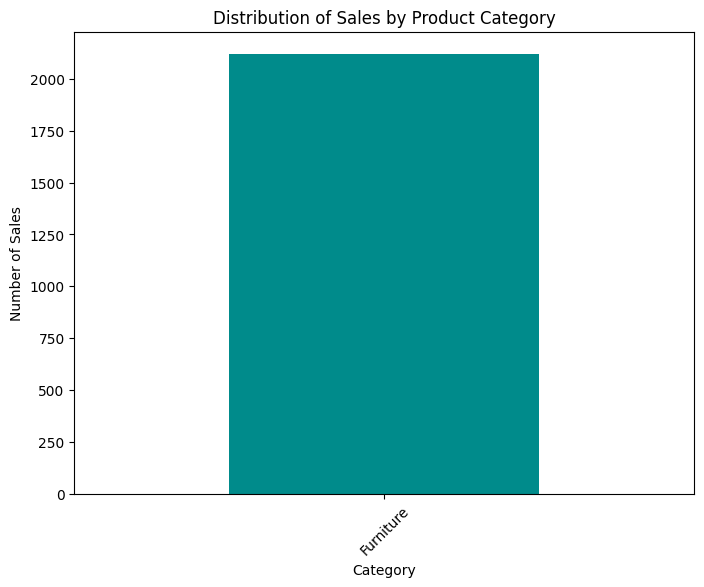

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Member 2
df_cleaned = pd.read_csv('/content/drive/MyDrive/stores_sales_forecasting_cleaned_2.csv', encoding='latin1')

print("--- Member 3: Handling Categorical Variables ---")
categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Use a fresh copy and reset the index to avoid alignment issues
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'])
df_reset = df_cleaned.reset_index(drop=True)

encoded_data = encoder.fit_transform(df_reset[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df_reset.drop(columns=categorical_cols, axis=1), encoded_df], axis=1)

print("Encoded DataFrame columns:")
print(df_encoded.columns)

# Visualization: Distribution of sales by category
category_counts = df_cleaned['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='darkcyan')
plt.title('Distribution of Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

# Export the updated data for the next member
df_encoded.to_csv('/content/drive/MyDrive/stores_sales_forecasting_cleaned_3.csv', index=False)